In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Импорт данных для лестницы W=2, L = 60

In [179]:
df1 = pd.read_excel('points.xlsx')

##  Линия FP - PP 

In [183]:
mu1, h1 = [], []
for i in [i for i in range(2,119)]:
    mu = (df1[(df1['Nup_total']==i+1) & (df1['Ndown_total']==1)]['E'].values[0] - df1[(df1['Nup_total']==i) & (df1['Ndown_total']==0)]['E'].values[0])/2
    h = (df1[(df1['Nup_total']==i-1) & (df1['Ndown_total']==1)]['E'].values[0] - df1[(df1['Nup_total']==i) & (df1['Ndown_total']==0)]['E'].values[0])/(-2)
    mu1.append(mu)
    h1.append(h)

## Линия ED - PP

In [184]:
mu2, h2 = [], []
for i in [i for i in range(1,118)]:
    mu = (df1[(df1['Nup_total']==i+1) & (df1['Ndown_total']==i+1)]['E'].values[0] - df1[(df1['Nup_total']==i) & (df1['Ndown_total']==i)]['E'].values[0])/2
    h = (df1[(df1['Nup_total']==i+1) & (df1['Ndown_total']==i-1)]['E'].values[0] - df1[(df1['Nup_total']==i) & (df1['Ndown_total']==i)]['E'].values[0])/2
    mu2.append(mu)
    h2.append(h)

## Горизонтальная линия V - ED

In [173]:
e11 = df1[(df1['Nup_total']==1) & (df1['Ndown_total']==1)]['E'].values[0]

In [174]:
e11

-8.719635157245866

## Линии V-FP1 и FP1 - FP2

In [185]:
e10 = df1[(df1['Nup_total']==1) & (df1['Ndown_total']==0)]['E'].values[0]

In [186]:
def mu(h):
    return -h +e10
def mu3(h):
    return -h - e10

# Диаграмма

In [205]:
h = np.arange(1.3664436131235131, 3, 0.1)
h3 = np.arange(6.5, 9, 0.1)

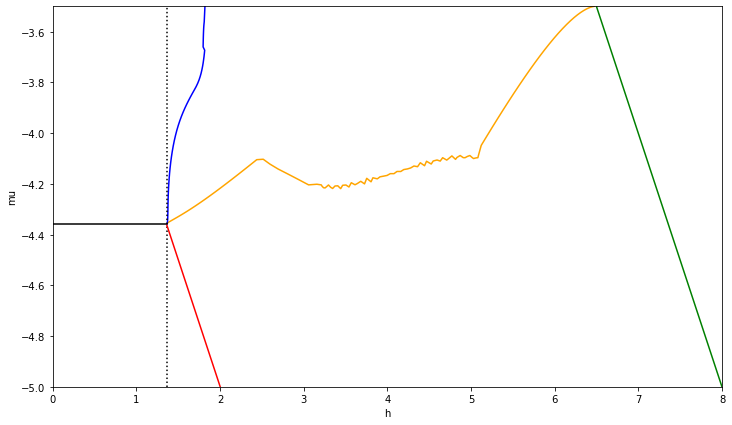

In [217]:
plt.figure(figsize=(12, 7))
plt.plot(h1, mu1, '-', color='orange')
plt.plot(h2, mu2, '-', color='blue')
plt.axis([0, 8, -5, -3.5])
plt.axhline(y=(e11/2), color='black', xmax = min(h2)/8)
plt.axvline(x=h2[0], linestyle=':', color='black')
plt.plot(h, mu(h), '-', color = 'red')
plt.plot(h3, mu3(h3), '-', color = 'green')
plt.xlabel('h')
plt.ylabel('mu')
plt.show()

## Сравнение результатов W = 2, L = 40 и L = 60

Загрузка данных

In [219]:
file_name = 'result-W=2.txt'
in_file = open(file_name, 'r')

lines = []
for line in in_file:
    lines.append(line.split())

for x in range(len(lines)):
    lines[x][0] = int(lines[x][0])
    lines[x][1], lines[x][2] = float(lines[x][1]), float(lines[x][2])

a = sorted(lines, key=lambda s: s[0])

mu_new = []
h_new = []
for x in range(len(a)):
    mu_new.append(a[x][1])
    h_new.append(a[x][2])

In [220]:
h_v = [1.3739898476828341, 1.3856126942303639, 1.3925023879208211, 1.4149337938215041, 1.4770868897435605, 1.5877537341449255, 1.7186044604914059, 1.7985651839414487, 1.8308224745193797, 1.8248955027994782, 1.8244473782542059, 1.8412284909265679]
mu_v = [-4.356665843324986, -4.324348668468353, -4.251302696838323, -4.139124715026448, -4.010811672587039, -3.90210287428458, -3.8175162461415937, -3.740099200059234, -3.6629342525976085, -3.5896581178988356, -3.4252859834116975, -3.356217562179438]

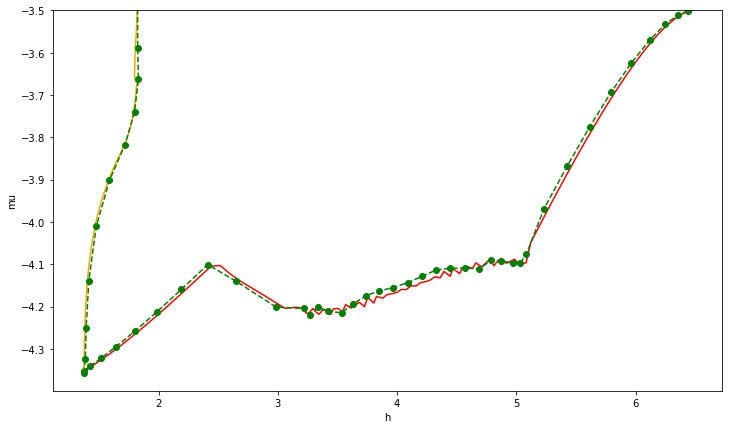

In [228]:
xscale = 5
plt.figure(figsize=(12, 7))
plt.plot(h1, mu1, '-', color='red')
plt.plot(h_new, mu_new, 'o--', color='green')

plt.axis(ymax = -3.5)
plt.plot(h2, mu2, '-', color='orange')
plt.plot(h_v, mu_v, 'o--', color='green')

plt.xlabel('h')
plt.ylabel('mu')
plt.show()

## Трехногая лестница